## Problem statement:
  #### The goal is to predict the target, heart_disease_present which represents whether or not a patient has heart disease.
#### 0 represents no heart disease present
#### 1 represents heart disease present

## The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.
####-->Age: displays the age of the individual.
####-->Sex: displays the gender of the individual using the following format :
1 = male
0 = female
####-->Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
1 = typical angina
2 = atypical angina
3 = non — anginal pain
4 = asymptotic
####-->Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
####-->Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
####-->Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)
####-->Resting ECG : displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy
####-->Max heart rate achieved : displays the max heart rate achieved by an individual.
Exercise induced angina :
1 = yes
0 = no
####-->ST depression induced by exercise relative to rest: displays the value which is an integer or float.
Peak exercise ST segment :
1 = upsloping
2 = flat
3 = downsloping
####-->Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
####--->Thal : displays the thalassemia :
3 = normal
6 = fixed defect
7 = reversible defect
####-->Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
0 = absence
1, 2, 3, 4 = present.


In [1]:
#importing the  required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading the data
data=pd.read_csv("/content/drive/My Drive/Summer Internship/datasets_216167_477177_heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
#checking the dtypes
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
#return the description for only numerical columns
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
data.columns.value_counts()

target      1
thalach     1
chol        1
sex         1
trestbps    1
exang       1
slope       1
cp          1
restecg     1
fbs         1
thal        1
oldpeak     1
age         1
ca          1
dtype: int64

In [7]:
#checked whether there are balanced number of 0's  and 1's
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

## we can find that the number of 0's and 1's are not balanced  in the target column and are needed to be balanced

In [8]:
# Separate input features (X) and target variable (y)
y = data.target
X = data.drop('target', axis=1)


In [9]:
  from sklearn.utils import resample

# Separate majority and minority classes
data_majority = data[data.target==0]
data_minority = data[data.target==1]
 
# Downsample majority class
data_majority_downsampled = resample(data_majority, 
                                 replace=True,    # sample without replacement
                                 n_samples=526,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
data_downsampled = pd.concat([data_majority_downsampled, data_minority])
 
# Display new class counts
data_downsampled.target.value_counts()


1    526
0    526
Name: target, dtype: int64

In [10]:
#getting the first few rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
#calculating the number of null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## from the above  we can conclude that there are  no null values of the given dataset

## statistical analysis

In [12]:
#checking the occurance or frequency of values  in a particular column
data['age'].value_counts()   #--->mode

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
63    32
41    32
67    31
61    31
55    30
65    27
43    26
53    26
42    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
70    14
39    14
38    12
68    12
40    11
71    11
69     9
34     6
37     6
29     4
76     3
74     3
77     3
Name: age, dtype: int64

In [13]:
# checking for the duplicated values
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
#calculating the mean
data.mean()

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64

In [15]:
#calculating the median
data.median()

age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     152.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [16]:
#to detect the missing values in the dataset
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
data.shape

(1025, 14)

In [18]:
# Checking the number of unique values in all the columns
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [19]:
data.columns #Returns column names


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
#renamed the columns
data.columns=('age','gender','chestpain','restingbloodpressure','Chlorestrol','Fasting Bloodsugar','Resting ECG','Max Heart Rate Achieved','Exercise induced angina','Old Peak ','Slope','Major vessels','Thalassemia','target')
data.head()

,age,gender,chestpain,restingbloodpressure,Chlorestrol,Fasting Bloodsugar,Resting ECG,Max Heart Rate Achieved,Exercise induced angina,Old Peak,Slope,Major vessels,Thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


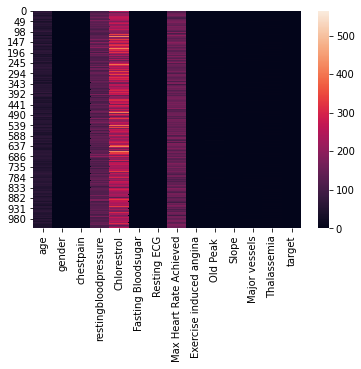

In [21]:
# Visualizing the data using heatmap
sns.heatmap(data)


In [22]:
data.age.corr(data.target)## checked the correlation between the age column and target

-0.22932355126761114

In [23]:
data.Thalassemia.corr(data.target)## checked the correlation between the Thalassemia and target

-0.3378381504571857

In [24]:
data.age.corr(data.gender)

-0.10324029759435573

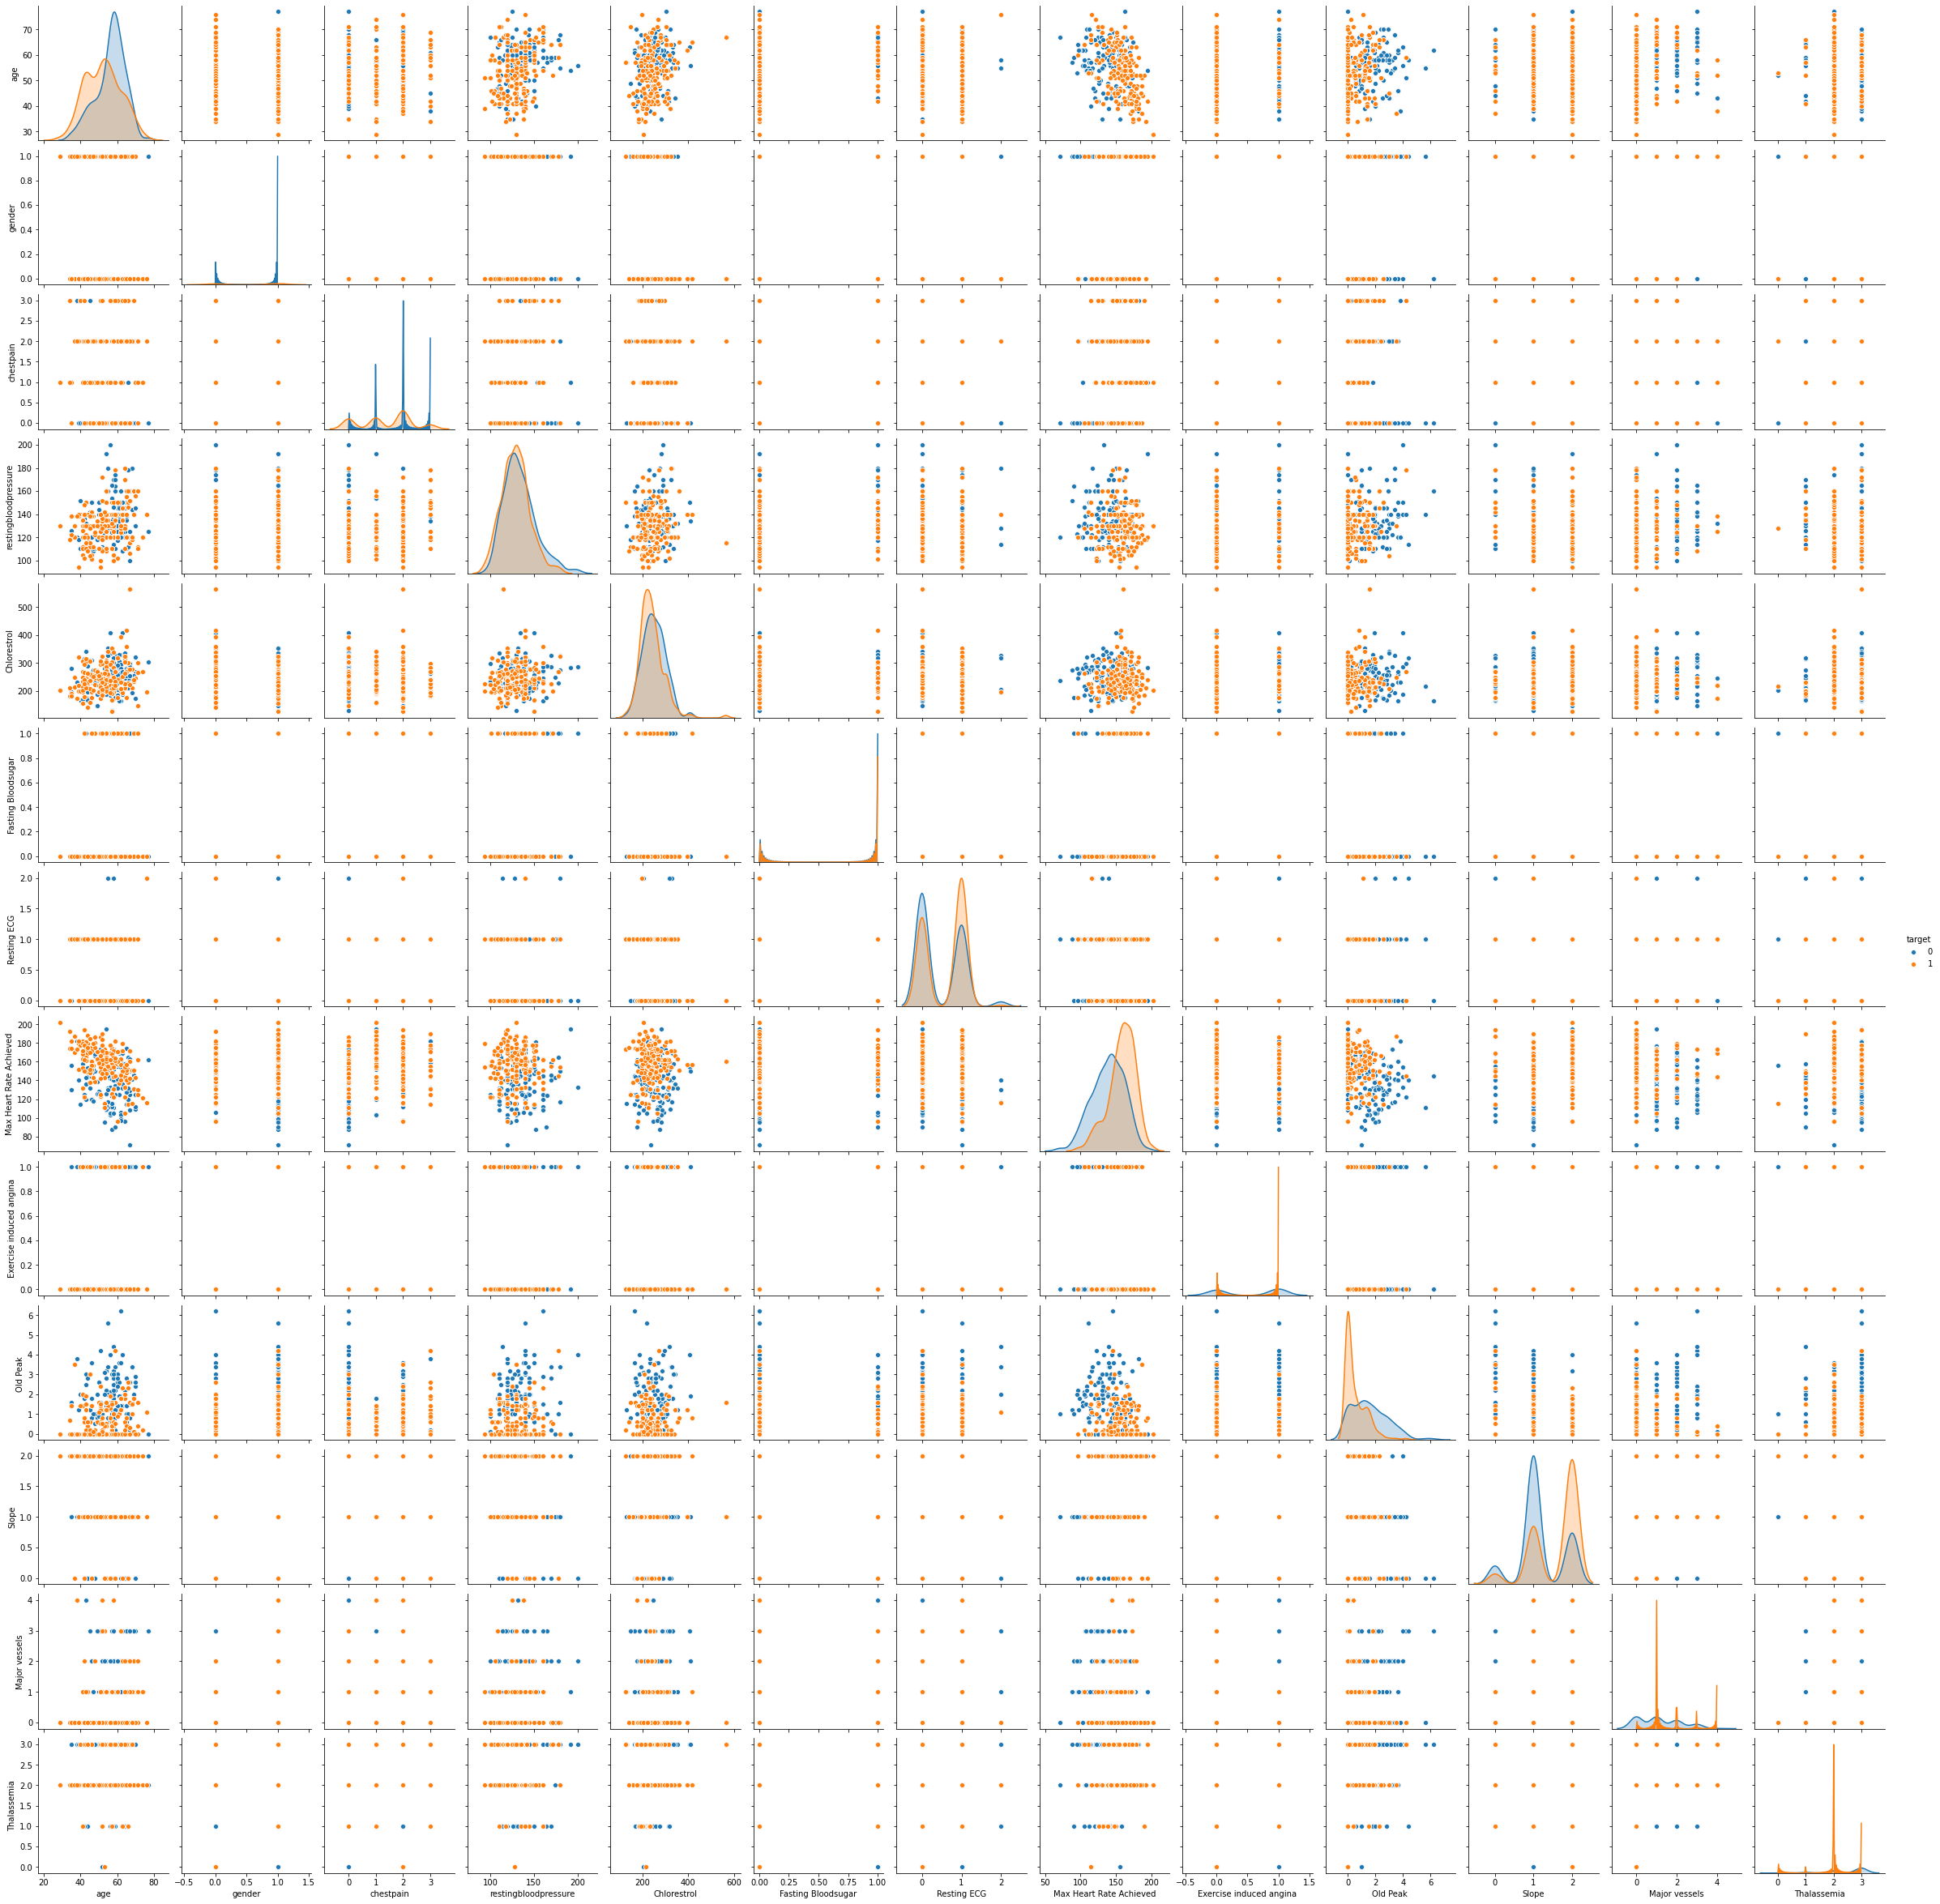

In [25]:
sns.pairplot(data,hue='target')


## The pairplot above allows us to see the distribution and relationship of numerical variables.  The scatter plots show relationship between plots. 

In [26]:
data['chestpain'].value_counts()  # chest pain type


0    497
2    284
1    167
3     77
Name: chestpain, dtype: int64

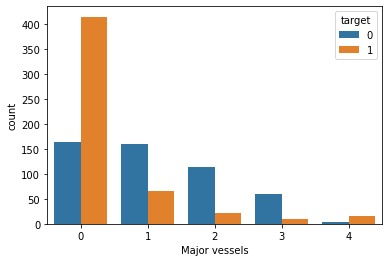

In [27]:
sns.countplot(x='Major vessels' ,hue='target', data=data)


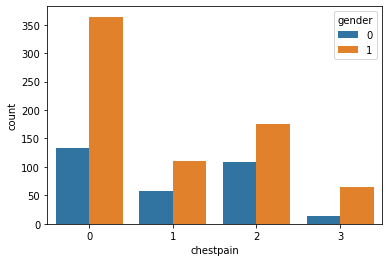

In [28]:
sns.countplot(x='chestpain', hue='gender',data=data)


# the above graph shows the  chest pain count experienced by male and female

## missingno---> It is specially used for checking(visualizing) the missing values



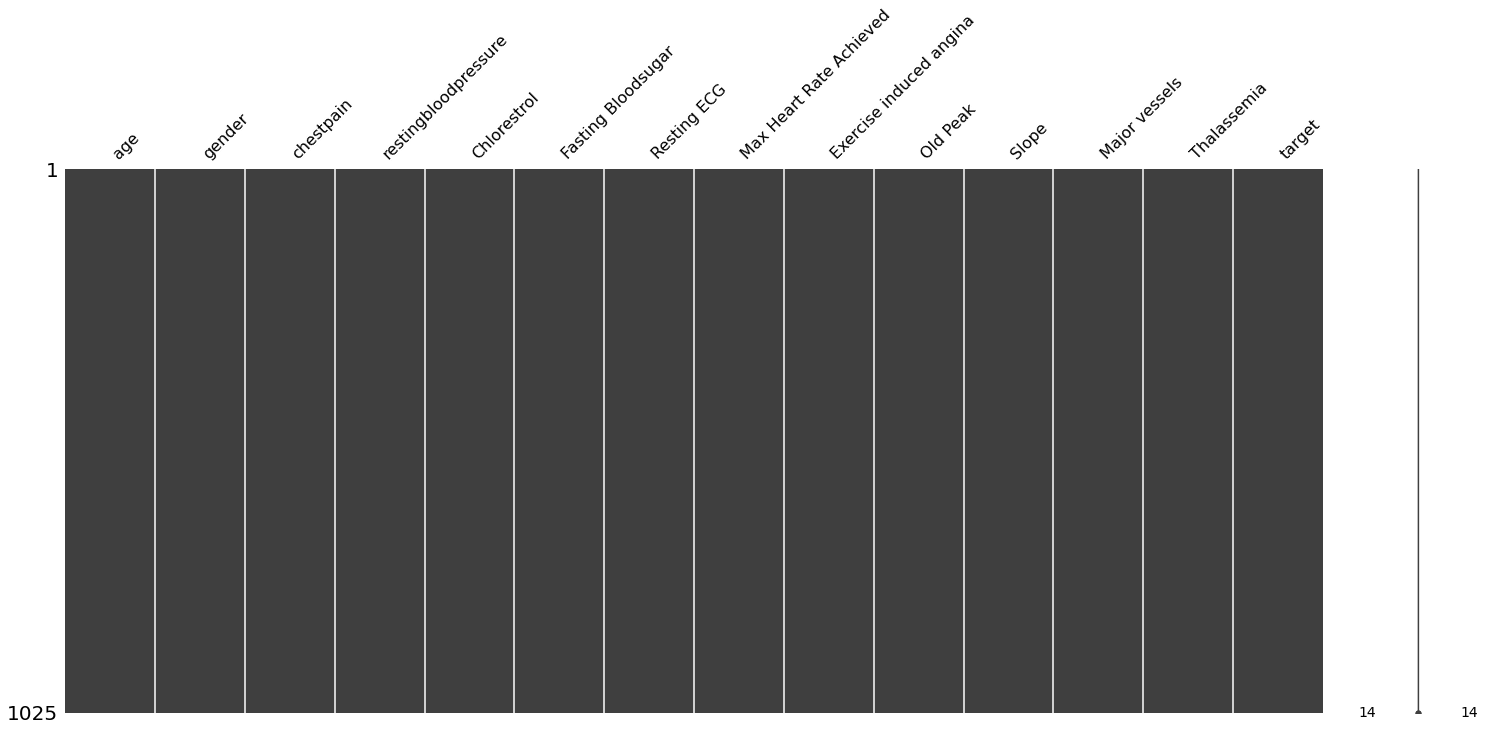

In [29]:
import missingno as msno
msno.matrix(data)


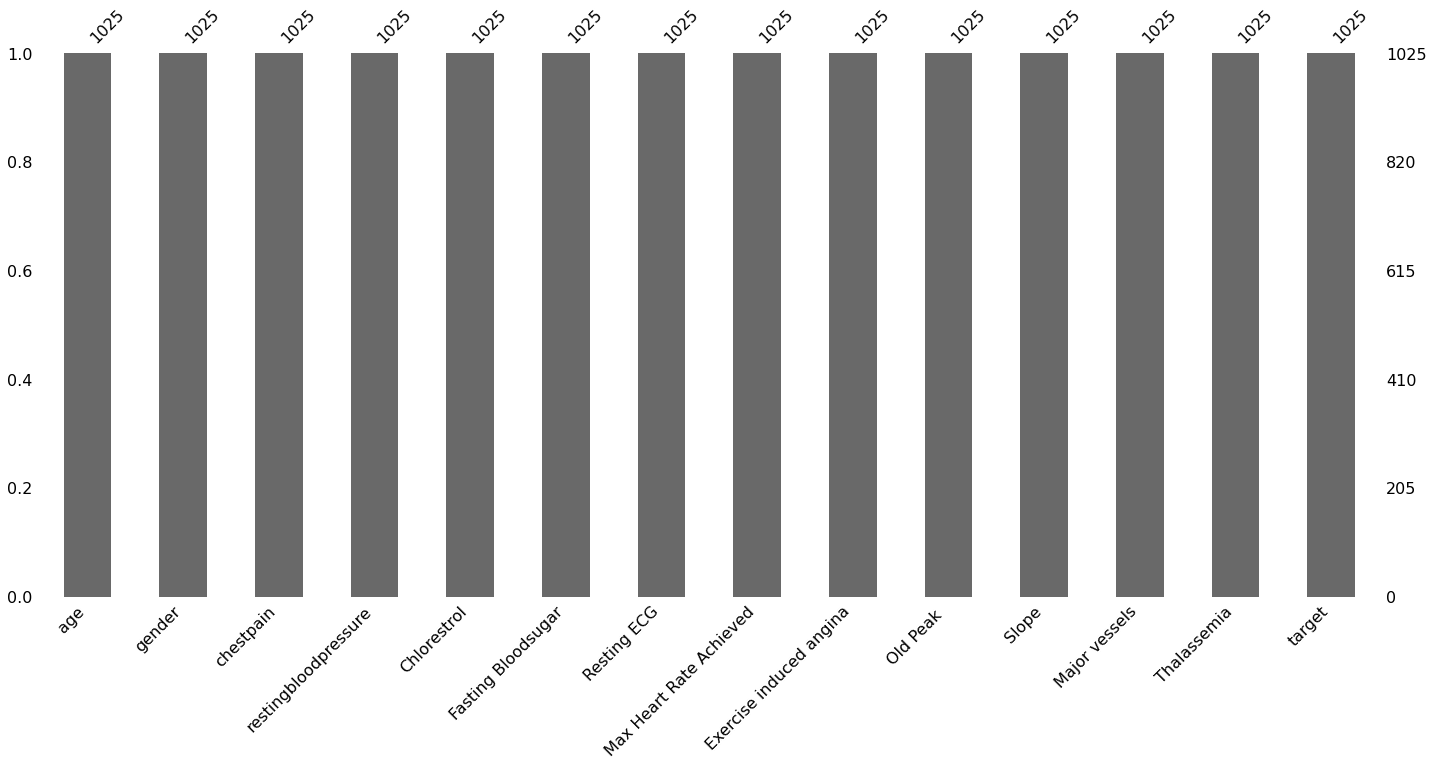

In [30]:
msno.bar(data)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88511d8d68>,
      dtype=object)

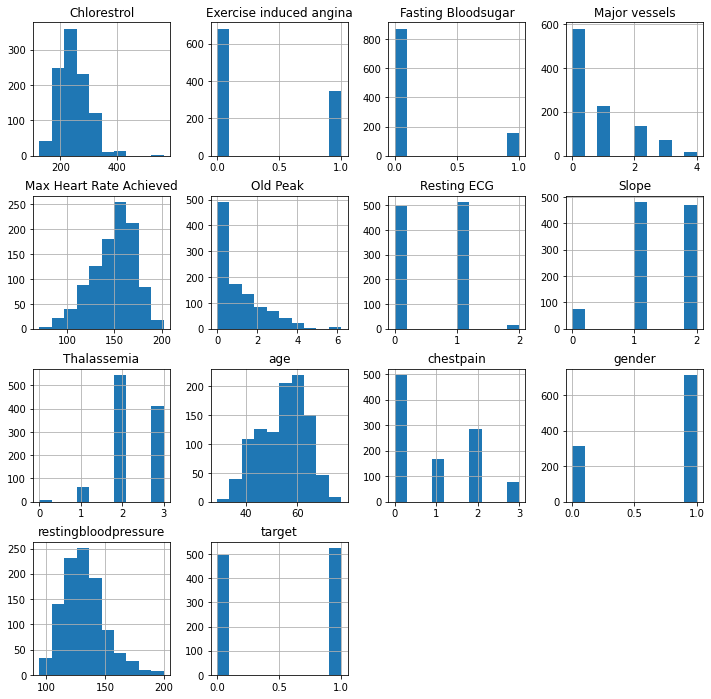

In [31]:
data.hist(figsize=(12,12))  

Text(0.5, 1.0, 'Variation of Age for each target class')

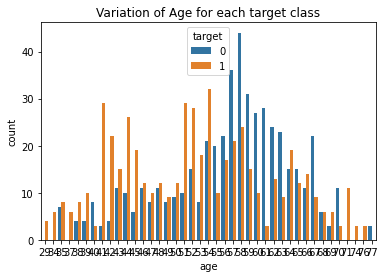

In [32]:
# distribution of target vs age 
#plt.figure(figsize=(12,12))
p=sns.countplot(data = data, x = 'age', hue = 'target')
p.set_title('Variation of Age for each target class')


##We see that most people who are suffering are of the age of 58, followed by 57.
##Majorly, people belonging to the age group 50+ are suffering from the disease.


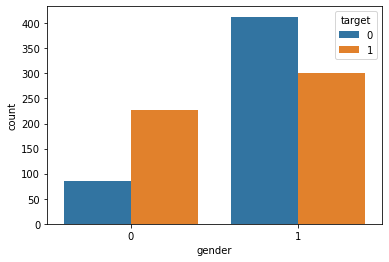

In [33]:
sns.countplot(x='gender', data=data,  hue='target')


###  Here 1 means male and 0 denotes female. we observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.



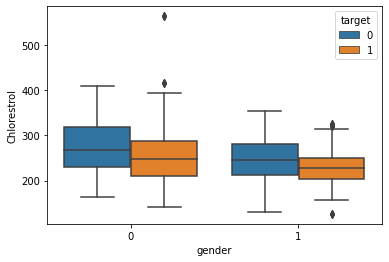

In [34]:
sns.boxplot(x='gender', y='Chlorestrol', hue='target',  data=data)


### we observe the outliers with the help of boxplot. outliers are values that are very small or large in the given data set.


## scaling the data

###  Feature Scaling--> when applied, this units and scaling will be removed
### To make the data unitless and scaless, we have to apply Feature Scaling



In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','restingbloodpressure','Chlorestrol','Max Heart Rate Achieved','Old Peak ']
data[columns_to_scale] = StandardScaler.fit_transform(data[columns_to_scale])
data.head()


,age,gender,chestpain,restingbloodpressure,Chlorestrol,Fasting Bloodsugar,Resting ECG,Max Heart Rate Achieved,Exercise induced angina,Old Peak,Slope,Major vessels,Thalassemia,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [36]:
#Splitting the dataset into training and test data.
# 80% of the data will be in training data and 20% of the data will be in testing
X = data.drop(['target'],axis=1)
y = data.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [37]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)


X_train- 10660
X_test- 2665
y_train- 820
y_test- 205


### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for Logistic Regression
## We have to apply this object(log_reg) to the training data
log_reg.fit(X_train, y_train) # with help of fit method we are fitting the 
                            ##Logistic Regression on training data
## objectName.fit(InputData, OutputData)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Instead of directly predicting on test data, let us see how well the model predicts the training data



In [39]:
## Predicting on the training data
## Syntax: objectName.predict(TrainInput)
y_train_pred = log_reg.predict(X_train)
y_train ==y_train_pred  # comparing original data output and model predicted output


315      True
204      True
363      True
5        True
1017     True
        ...  
835      True
192      True
629     False
559      True
684      True
Name: target, Length: 820, dtype: bool

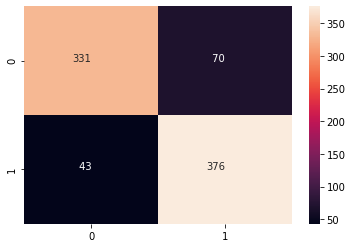

In [40]:
# Confusion matrix for training data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


In [41]:
print('true_negative=', conf[0][0])
print('false_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_positive=',  conf[1][1])


true_negative= 331
false_positive= 70
false_negative= 43
true_positive= 376


In [42]:
#classification report on training data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

           0       0.89      0.83      0.85       401
           1       0.84      0.90      0.87       419

    accuracy                           0.86       820
   macro avg       0.86      0.86      0.86       820
weighted avg       0.86      0.86      0.86       820



In [43]:
## accuracy_score---> With help of this metric, we can evaluate the overall 
## performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)


0.8621951219512195

### . predicting on test data 

In [44]:
## Predict the model on Test:
y_test_pred = log_reg.predict(X_test)
y_test==y_test_pred


807     True
27     False
77      True
406     True
886     True
       ...  
877     True
320     True
362     True
452     True
500     True
Name: target, Length: 205, dtype: bool

In [45]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_test_pred)
cm


array([[ 77,  21],
       [  7, 100]])

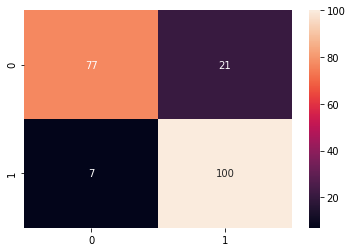

In [46]:


from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')


In [47]:
print('true_negative=', conf[0][0])
print('false_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_positive=',  conf[1][1])


true_negative= 77
false_positive= 21
false_negative= 7
true_positive= 100


In [48]:
## accuracy of the test data(Original test data output and the model predicted 
## output)
accuracy_score(y_test, y_test_pred)


0.8634146341463415

In [49]:
#classification report on testing data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



### Gaussian Naive Bayes

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
## Predicting on the training data
## Syntax: objectName.predict(TrainInput)
y_train_pred = classifier.predict(X_train)
y_train ==y_train_pred  # comparing original data output and model predicted output


880    False
358    False
772     True
682     True
848     True
       ...  
905     True
767     True
72      True
908     True
235     True
Name: target, Length: 820, dtype: bool

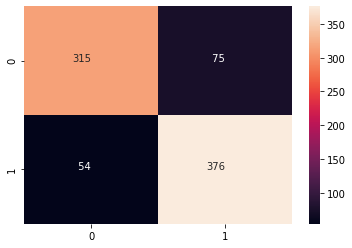

In [52]:
# Confusion matrix for training data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


In [53]:
print('true_negative=', conf[0][0])
print('false_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_positive=',  conf[1][1])


true_negative= 315
false_positive= 75
false_negative= 54
true_positive= 376


In [54]:
## accuracy_score---> With help of this metric, we can evaluate the overall 
## performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)


0.8426829268292683

In [55]:
#classification report on training data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       390
           1       0.83      0.87      0.85       430

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820



### predicting  on test data

In [56]:
## Predict the model on Test:
y_test_pred = classifier.predict(X_test)
y_test==y_test_pred


49      True
525     True
119     True
629    False
186     True
       ...  
860    False
521    False
790     True
340     True
447     True
Name: target, Length: 205, dtype: bool

In [57]:
## accuracy of the test data(Original test data output and the model predicted 
## output)
accuracy_score(y_test, y_test_pred)


0.7804878048780488

In [58]:
#classification report on testing data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.86      0.71      0.77       109
           1       0.72      0.86      0.79        96

    accuracy                           0.78       205
   macro avg       0.79      0.79      0.78       205
weighted avg       0.79      0.78      0.78       205



### KNeighoursClassifier

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')## creating an object for KNeighborsClassifier
## We have to apply this object() to the training data
KNN.fit(X_train, y_train) # with help of fit method we are fitting the 
                            ##KNeighborsClassifier on training data
## objectName.fit(InputData, OutputData)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
## Predicting on the training data
## Syntax: objectName.predict(TrainInput)
y_train_pred = KNN.predict(X_train)
y_train ==y_train_pred  # comparing original data output and model predicted output


172    False
128     True
363     True
636     True
798    False
       ...  
299     True
534     True
584     True
493     True
527     True
Name: target, Length: 820, dtype: bool

In [61]:
## accuracy_score---> With help of this metric, we can evaluate the overall 
## performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)


0.9426829268292682

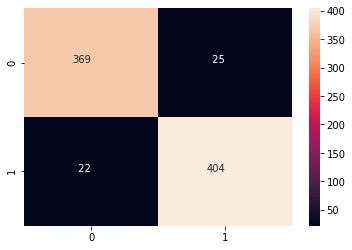

In [62]:
# Confusion matrix for training data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


In [63]:
## Predict the model on Test:
y_test_pred = KNN.predict(X_test)
y_test==y_test_pred


546    False
980     True
908     True
577    False
846     True
       ...  
922     True
832    False
451     True
775     True
926     True
Name: target, Length: 205, dtype: bool

In [64]:
## accuracy of the test data(Original test data output and the model predicted 
## output)
accuracy_score(y_test, y_test_pred)


0.8292682926829268

In [65]:
#classification report on testing data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       105
           1       0.81      0.85      0.83       100

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



## the accuracy  for the test set achieved by  logistic regression is:  0.86
## the accuracy  for the test set achieved by naive bayes:0.78
## the accuracy  for the test set achieved byknn is:0.83

We see that the highest accuracy for the test set is achieved by Logistic Regression  which is equal to  86%


  ## Visualising the best model among logistic regression, NaiveBayes, kNeighboursClassifier


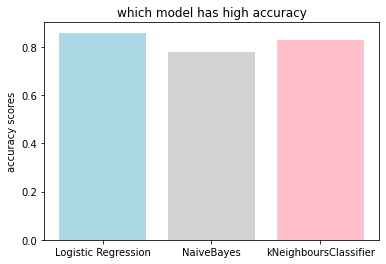

In [66]:
 
models=['Logistic Regression','NaiveBayes','kNeighboursClassifier']
accuracy_scores=[0.86,0.78,0.83]
plt.bar(models,accuracy_scores,color=['lightblue','lightgrey','pink'])
plt.ylabel("accuracy scores")
plt.title("which model has high accuracy")
plt.show()